In [1]:
pip install newspaper3k


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lxml[html_clean]


In [6]:
from newspaper import Article
import pandas as pd

In [4]:
urls = ["https://www.nature.org/en-us/about-us/where-we-work/priority-landscapes/gulf/stories-in-the-gulf/nature-based-solutions-gulf/",
       "https://www.arup.com/en-us/insights/protecting-coastlines-and-communities-with-nature-based-solutions/",
       "https://www.epa.gov/water-research/coastal-community-resilience-research",
       "https://www.dredgingtoday.com/2025/01/08/fish-and-wildlife-service-25m-for-coastal-wetlands-restoration/",
       "https://floridadep.gov/rcp/resilient-florida-program/content/resilient-florida-program-living-shorelines",
       "https://www.fws.gov/press-release/2025-01/more-25-million-protect-and-restore-coastal-wetlands-and-build-coastal",
       "https://www.pewtrusts.org/en/research-and-analysis/articles/2024/06/20/states-harness-coastal-wetlands-to-meet-climate-goals",
       "https://www.theengineer.co.uk/content/opinion/turning-to-nature-to-protect-coastal-communities/",
       "https://www.nature.org/en-us/about-us/where-we-work/asia-pacific/new-zealand/stories-in-new-zealand/blue-carbon/",
       "https://www.nature.org/en-us/newsroom/developing-new-zealand-blue-carbon-projects/",
       "https://www.pewtrusts.org/en/projects/advancing-coastal-wetlands-conservation",
       "https://www.usgs.gov/news/featured-story/science-transformed-a-dry-streambed-oasis",
       "https://nrc.canada.ca/en/stories/dredged-sand-used-nature-based-solution-against-coastal-erosion",
       "https://www.weforum.org/stories/2024/07/how-reframing-the-value-blue-carbon-could-help-to-support-local-communities/",
       "https://www.aramco.com/en/news-media/elements-magazine/2024/harnessing-the-power-of-nature-based-solutions",
       "https://news.mongabay.com/2025/04/mangroves-mount-a-fragile-green-revival-in-iraqs-toxic-south/",
       "https://news.mongabay.com/podcast/how-coastal-communities-are-adapting-to-sea-level-rise-with-living-shorelines/",
       "https://news.mongabay.com/2024/02/what-principles-should-define-natural-climate-solutions-a-new-study-has-some-answers/",
       "https://news.mongabay.com/2021/08/cost-of-wetlands-free-storm-damage-they-prevent-38-million-per-estuary/",
       "https://news.mongabay.com/2023/12/thailand-tries-nature-based-water-management-to-adapt-to-climate-change/",
       "https://news.mongabay.com/podcast/podcast-are-nature-based-solutions-the-best-fix-for-climate-change/",
       "https://news.mongabay.com/2021/03/rivers-can-be-climate-change-solutions-too-commentary/",
       "https://news.mongabay.com/2023/06/for-urban-poor-in-global-south-nature-based-solutions-have-always-been-a-way-to-get-by/",
       "https://news.mongabay.com/2021/10/look-beyond-carbon-credits-to-put-a-price-on-natures-services-experts-say/",
       "https://news.mongabay.com/2021/07/building-back-miamis-biscayne-bay-do-natural-solutions-hold-hope/",
       "https://news.mongabay.com/2024/12/southeast-asia-in-review-2024/",
       "https://news.mongabay.com/2024/02/where-sea-otters-play-salt-marshes-stay-new-study-shows/",
       "https://news.mongabay.com/2024/06/a-brazilian-city-restores-its-mangroves-to-protect-against-climate-change/",
       "https://news.mongabay.com/2024/02/pakistan-bucks-global-trend-with-30-year-mangrove-expansion/",
       "https://india.mongabay.com/2022/03/commentary-a-city-on-marsh-why-indian-coastal-cities-need-to-design-and-build-with-nature/",
       "https://news.mongabay.com/2024/10/thailands-budding-mangrove-restoration-plans-spark-both-hope-and-concern/",
       "https://news.mongabay.com/2020/10/singapore-embarks-on-a-million-tree-planting-spree-to-protect-its-future/",
       "https://india.mongabay.com/2025/04/the-conservation-conundrum-leaves-shrimp-farmers-on-edge/",
       "https://india.mongabay.com/2020/01/states-can-alter-activities-prohibited-in-wetlands-as-per-latest-guidelines/",
       "https://www.theguardian.com/us-news/2022/aug/12/seawalls-nature-based-alternatives-us",
       "https://www.carbonbrief.org/cropped-17-november-2021-deforestation-declarations-food-systems-nature-based-solutions/",
       "https://www.theguardian.com/environment/2023/nov/29/from-tree-planting-to-sponge-cities-why-nature-based-solutions-are-crucial-to-fighting-the-climate-crisis",
       "https://www.theguardian.com/environment/2020/oct/14/re-wild-to-mitigate-the-climate-crisis-urge-leading-scientists",
       "https://www.theguardian.com/environment/2021/jun/10/climate-and-nature-crises-solve-both-or-solve-neither-say-experts",
       "https://www.theguardian.com/environment/2022/mar/17/can-oysters-save-new-york-city-from-next-big-storm",
       "https://www.theguardian.com/environment/2023/mar/28/weve-seen-oiled-birds-fears-for-protected-wetlands-after-poole-harbour-spill",
       "https://www.aljazeera.com/opinions/2021/10/31/restoring-wetlands-can-help-combat-climate-change",
       "https://www.reuters.com/business/sustainable-business/bluer-horizons-putting-coastal-communities-before-carbon-markets-2023-04-19/"]

In [9]:
data_media = []

for url in urls:
    try:
        article = Article(url)
        article.download()
        article.parse()

        data_media.append({
            'url': url,
            'title': article.title,
            'text': article.text
        })

        print(f"Scraped: {article.title}")

    except Exception as e:
        print(f"Failed to scrape {url}: {e}")

import os


os.makedirs('data_media/raw', exist_ok=True)

df_media = pd.DataFrame(data_media)
df_media.to_csv('data_media/raw/media_articles.csv', index=False)
print("All articles saved to data_media/raw/media_articles.csv")

Scraped: Nature-Based Solutions for the Gulf
Scraped: Protecting coastlines and communities with nature-based solutions
Scraped: Coastal Community Resilience Research
Scraped: Fish and Wildlife Service: $25M for coastal wetlands restoration
Scraped: Resilient Florida Program - Living Shorelines
Scraped: More Than $25 Million To Protect and Restore Coastal Wetlands and Build Coastal Resiliency
Scraped: States Harness Coastal Wetlands to Meet Climate Goals
Scraped: Turning to nature to protect coastal communities
Scraped: Advancing Blue Carbon in New Zealand's Coastal Wetlands
Scraped: New Research Report—Developing New Zealand Blue Carbon Projects
Scraped: Advancing Coastal Wetlands Conservation
Scraped: The science that transformed a dry streambed into an oasis
Scraped: Dredged sand used as a nature-based solution against coastal erosion
Scraped: Why we need to expand the horizons of blue carbon projects
Scraped: Harnessing the power of nature-based solutions
Scraped: Mangroves mount a

In [56]:
import pandas as pd
df_media = pd.read_csv('data_media/raw/media_articles.csv')

print(df_media.head())

                                                 url  \
0  https://www.nature.org/en-us/about-us/where-we...   
1  https://www.arup.com/en-us/insights/protecting...   
2  https://www.epa.gov/water-research/coastal-com...   
3  https://www.dredgingtoday.com/2025/01/08/fish-...   
4  https://floridadep.gov/rcp/resilient-florida-p...   

                                               title  \
0                Nature-Based Solutions for the Gulf   
1  Protecting coastlines and communities with nat...   
2              Coastal Community Resilience Research   
3  Fish and Wildlife Service: $25M for coastal we...   
4      Resilient Florida Program - Living Shorelines   

                                                text  
0  As we welcome spring to the Gulf Coast, nestin...  
1  Concepts we are exploring include:\n\nCreating...  
2  On this page:\n\nEPA is collaborating with par...  
3                                                NaN  
4  Shorelines are dynamic environments that under..

In [57]:
df_media['clean_text'] = df_media['text'].str.replace('\n', ' ', regex=True).str.strip()

In [11]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [59]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:
sid = SentimentIntensityAnalyzer()

df_media['sentiment_scores'] = df_media['clean_text'].apply(
    lambda x: sid.polarity_scores(str(x)) if pd.notnull(x) else {'compound': 0.0, 'pos': 0.0, 'neu': 1.0, 'neg': 0.0}
)

df_media['compound_score'] = df_media['sentiment_scores'].apply(lambda x: x['compound'])

df_media['sentiment'] = df_media['compound_score'].apply(
    lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral')
)

print(df_media[['title', 'sentiment']].head())


                                               title sentiment
0                Nature-Based Solutions for the Gulf  positive
1  Protecting coastlines and communities with nat...  positive
2              Coastal Community Resilience Research  positive
3  Fish and Wildlife Service: $25M for coastal we...   neutral
4      Resilient Florida Program - Living Shorelines  positive


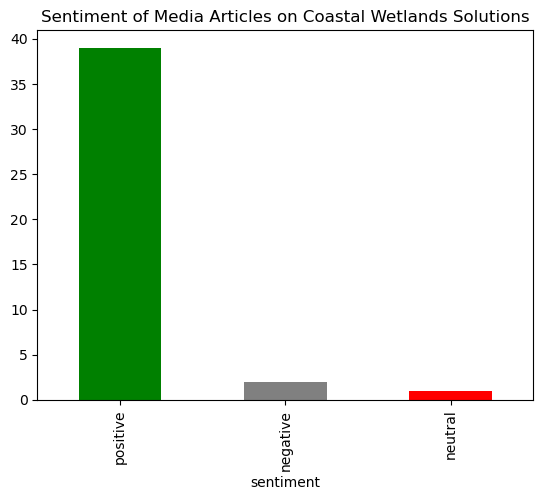

In [61]:
import matplotlib.pyplot as plt

df_media['sentiment'].value_counts().plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Sentiment of Media Articles on Coastal Wetlands Solutions')


plt.show()

In [62]:
sentiment_counts = df_media['sentiment'].value_counts()

sentiment_percentage = (sentiment_counts / len(df_media)) * 100

print(f"Positive Sentiment: {sentiment_percentage.get('positive', 0):.2f}%")
print(f"Negative Sentiment: {sentiment_percentage.get('negative', 0):.2f}%")
print(f"Neutral Sentiment: {sentiment_percentage.get('neutral', 0):.2f}%")

Positive Sentiment: 92.86%
Negative Sentiment: 4.76%
Neutral Sentiment: 2.38%


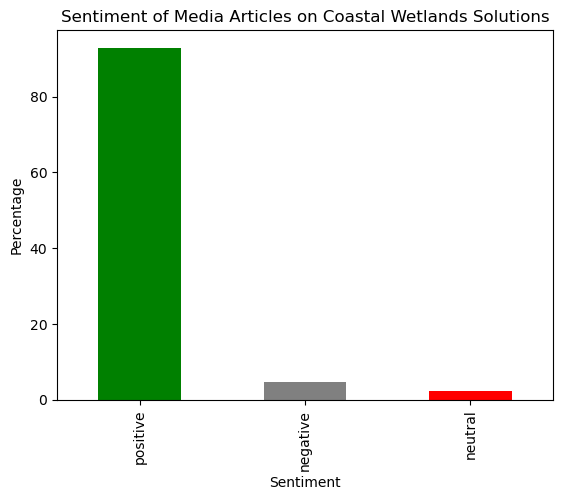

In [17]:
sentiment_percentage.plot(kind='bar', color=['green', 'grey', 'red'])

plt.title('Sentiment of Media Articles on Coastal Wetlands Solutions')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

plt.savefig('sentiment_wetlands_media.png', dpi=300)
plt.show()

In [18]:
pip install requests pandas


Note: you may need to restart the kernel to use updated packages.


In [31]:
import requests
import time

base_url = "https://api.semanticscholar.org/graph/v1/paper/search"
query = 'nature-based solutions coastal wetlands'
total_papers = 100 
papers_per_request = 10  
all_papers = []  
offset = 0  
retries = 0  
while len(all_papers) < total_papers:
    params = {
        'query': query,
        'offset': offset,
        'limit': papers_per_request,
        'fields': 'title,abstract,authors,year,url'
    }
    
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        papers = response.json()['data']
        all_papers.extend(papers)  
        print(f"Fetched {len(papers)} papers. Total so far: {len(all_papers)}")
        
        offset += papers_per_request  
        retries = 0 
    elif response.status_code == 429:
        print(f"Rate limit hit. Retrying in {2 ** retries} seconds...")
        retries += 1
        time.sleep(2 ** retries) 
    else:
        print(f"Error: Unable to fetch data. Status code {response.status_code}")
        break
    
    time.sleep(30)  
print(f"Total papers fetched: {len(all_papers)}")



Rate limit hit. Retrying in 1 seconds...
Rate limit hit. Retrying in 2 seconds...
Rate limit hit. Retrying in 4 seconds...
Fetched 10 papers. Total so far: 10
Fetched 10 papers. Total so far: 20
Fetched 10 papers. Total so far: 30
Rate limit hit. Retrying in 1 seconds...
Fetched 10 papers. Total so far: 40
Fetched 10 papers. Total so far: 50
Fetched 10 papers. Total so far: 60
Fetched 10 papers. Total so far: 70
Fetched 10 papers. Total so far: 80
Fetched 10 papers. Total so far: 90
Fetched 10 papers. Total so far: 100
Total papers fetched: 100


In [32]:
papers_data = []

for paper in all_papers:
    paper_info = {
        'title': paper.get('title'),
        'abstract': paper.get('abstract'),
        'authors': ', '.join([author.get('name') for author in paper.get('authors', [])]),  # Join authors' names
        'year': paper.get('year'),
        'url': paper.get('url')
    }
    papers_data.append(paper_info)

df = pd.DataFrame(papers_data)

df.to_csv('coastal_wetlands_papers.csv', index=False)

print("Data saved to 'coastal_wetlands_papers.csv'.")

Data saved to 'coastal_wetlands_papers.csv'.


In [2]:
import pandas as pd
df = pd.read_csv('coastal_wetlands_papers.csv')

df.head()

,title,abstract,authors,year,url
0,Nature-based solutions could offset coastal sq...,"In this study, we explored the opportunities f...","K. Thorne, Kevin J. Buffington, Michael J. Osl...",2025.0,https://www.semanticscholar.org/paper/e6a75652...
1,Constructed wetlands as nature based solutions...,This work presents an engaging hands-on activi...,"C. M. Almeida, Tomé Azevedo, Laura Guimarães",2024.0,https://www.semanticscholar.org/paper/1f46d22c...
2,Wetland Vulnerability Metrics as a Rapid Indic...,"Flood mitigation in low-gradient, tidally-infl...","N. Pricope, Greer Shivers",2022.0,https://www.semanticscholar.org/paper/554221aa...
3,"Draft resolution on protection, management and...",NaN,NaN,2022.0,https://www.semanticscholar.org/paper/ae52d8d4...
4,"Draft resolution on protection, management and...",NaN,NaN,2022.0,https://www.semanticscholar.org/paper/057701f9...


In [3]:

import re
def preprocess_text(text):
   
    if isinstance(text, str):
        
        text = re.sub(r'[^a-zA-Z\s]', '', text)
      
        text = text.lower()
       
        text = " ".join(text.split())
    else:
       
        text = ''
    return text

df['cleaned_abstract'] = df['abstract'].apply(preprocess_text)

In [4]:
df['abstract'].isnull().sum()

df['abstract'].fillna('')

0     In this study, we explored the opportunities f...
1     This work presents an engaging hands-on activi...
2     Flood mitigation in low-gradient, tidally-infl...
3                                                      
4                                                      
                            ...                        
95    Coastal protection, an important coral reef ec...
96    Aquaculture production has very significantly ...
97    Coastal areas, especially deltas, are some of ...
98                                                     
99                                                     
Name: abstract, Length: 100, dtype: object

In [5]:
df['cleaned_abstract'] = df['abstract'].apply(preprocess_text)

In [6]:
df.head()

,title,abstract,authors,year,url,cleaned_abstract
0,Nature-based solutions could offset coastal sq...,"In this study, we explored the opportunities f...","K. Thorne, Kevin J. Buffington, Michael J. Osl...",2025.0,https://www.semanticscholar.org/paper/e6a75652...,in this study we explored the opportunities fo...
1,Constructed wetlands as nature based solutions...,This work presents an engaging hands-on activi...,"C. M. Almeida, Tomé Azevedo, Laura Guimarães",2024.0,https://www.semanticscholar.org/paper/1f46d22c...,this work presents an engaging handson activit...
2,Wetland Vulnerability Metrics as a Rapid Indic...,"Flood mitigation in low-gradient, tidally-infl...","N. Pricope, Greer Shivers",2022.0,https://www.semanticscholar.org/paper/554221aa...,flood mitigation in lowgradient tidallyinfluen...
3,"Draft resolution on protection, management and...",NaN,NaN,2022.0,https://www.semanticscholar.org/paper/ae52d8d4...,
4,"Draft resolution on protection, management and...",NaN,NaN,2022.0,https://www.semanticscholar.org/paper/057701f9...,


In [7]:
!pip install textblob


In [8]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['cleaned_abstract'].apply(get_sentiment)

print(df[['title', 'sentiment']].head())

                                               title sentiment
0  Nature-based solutions could offset coastal sq...  positive
1  Constructed wetlands as nature based solutions...  positive
2  Wetland Vulnerability Metrics as a Rapid Indic...  positive
3  Draft resolution on protection, management and...   neutral
4  Draft resolution on protection, management and...   neutral


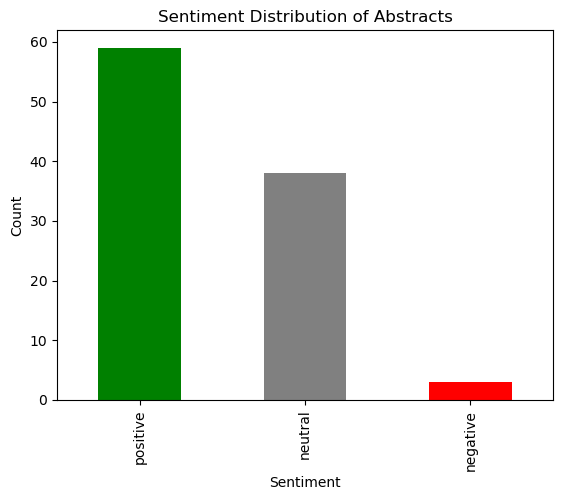

In [15]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Sentiment Distribution of Abstracts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [18]:
df.to_csv('papers_with_sentiment.csv', index=False)


In [78]:
research_sentiment_counts = df['sentiment'].value_counts()

research_sentiment_percentage = (research_sentiment_counts / len(df)) * 100

print(f"Positive Sentiment: {research_sentiment_percentage.get('positive', 0):.2f}%")
print(f"Negative Sentiment: {research_sentiment_percentage.get('negative', 0):.2f}%")
print(f"Neutral Sentiment: {research_sentiment_percentage.get('neutral', 0):.2f}%")

Positive Sentiment: 59.00%
Negative Sentiment: 3.00%
Neutral Sentiment: 38.00%


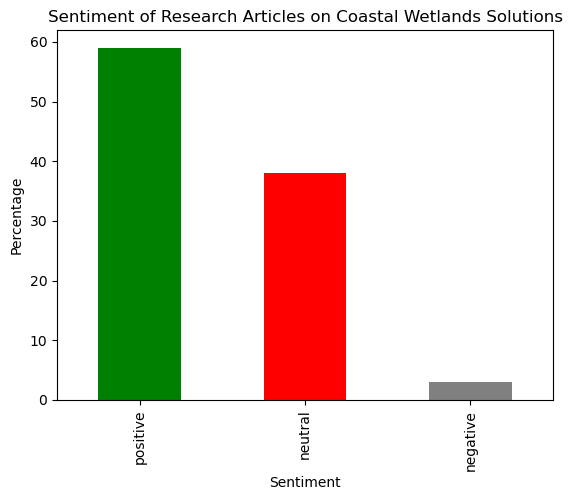

In [79]:
research_sentiment_percentage.plot(kind='bar', color=['green', 'red', 'grey'])

plt.title('Sentiment of Research Articles on Coastal Wetlands Solutions')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.savefig('sentiment_wetlands_research.png', dpi=300)
plt.show()

In [80]:
df.head()

,title,abstract,authors,year,url,cleaned_abstract,sentiment,NbS_type
0,Nature-based solutions could offset coastal sq...,"In this study, we explored the opportunities f...","K. Thorne, Kevin J. Buffington, Michael J. Osl...",2025.0,https://www.semanticscholar.org/paper/e6a75652...,in this study we explored the opportunities fo...,positive,Other
1,Constructed wetlands as nature based solutions...,This work presents an engaging hands-on activi...,"C. M. Almeida, Tomé Azevedo, Laura Guimarães",2024.0,https://www.semanticscholar.org/paper/1f46d22c...,this work presents an engaging handson activit...,positive,Other
2,Wetland Vulnerability Metrics as a Rapid Indic...,"Flood mitigation in low-gradient, tidally-infl...","N. Pricope, Greer Shivers",2022.0,https://www.semanticscholar.org/paper/554221aa...,flood mitigation in lowgradient tidallyinfluen...,positive,Marshes
3,"Draft resolution on protection, management and...",NaN,NaN,2022.0,https://www.semanticscholar.org/paper/ae52d8d4...,,neutral,Other
4,"Draft resolution on protection, management and...",NaN,NaN,2022.0,https://www.semanticscholar.org/paper/057701f9...,,neutral,Other


In [81]:
nbs_keywords = {
    'Seagrasses': ['seagrasses', 'seagrass beds', 'seagrass meadows'],
    'Mangroves': ['mangroves', 'mangrove swamps'],
    'Marshes': ['marsh', 'salt marsh', 'salt marshes'],
    'Swamps': ['forested swamps'],
    'Tidal Wetlands': ['tidal marsh', 'estauries']
}

In [82]:
def extract_nbs_type(abstract):
    if pd.isna(abstract):
        return 'Other'
    abstract_lower = str(abstract).lower()
    for category, keywords in nbs_keywords.items():
        for keyword in keywords:
            if keyword in abstract_lower:
                return category
    return 'Other'

In [83]:
df['NbS_type'] = df['abstract'].apply(extract_nbs_type)


In [84]:
df[['abstract','NbS_type']].head(10)

,abstract,NbS_type
0,"In this study, we explored the opportunities f...",Other
1,This work presents an engaging hands-on activi...,Other
2,"Flood mitigation in low-gradient, tidally-infl...",Marshes
3,NaN,Other
4,NaN,Other
5,Nature-based solutions (NbS) offer a promising...,Other
6,NaN,Other
7,"\n\n\nNature‐based solutions (NbS), integratin...",Marshes
8,NaN,Other
9,"In the last decades, so‐called internal or sea...",Other


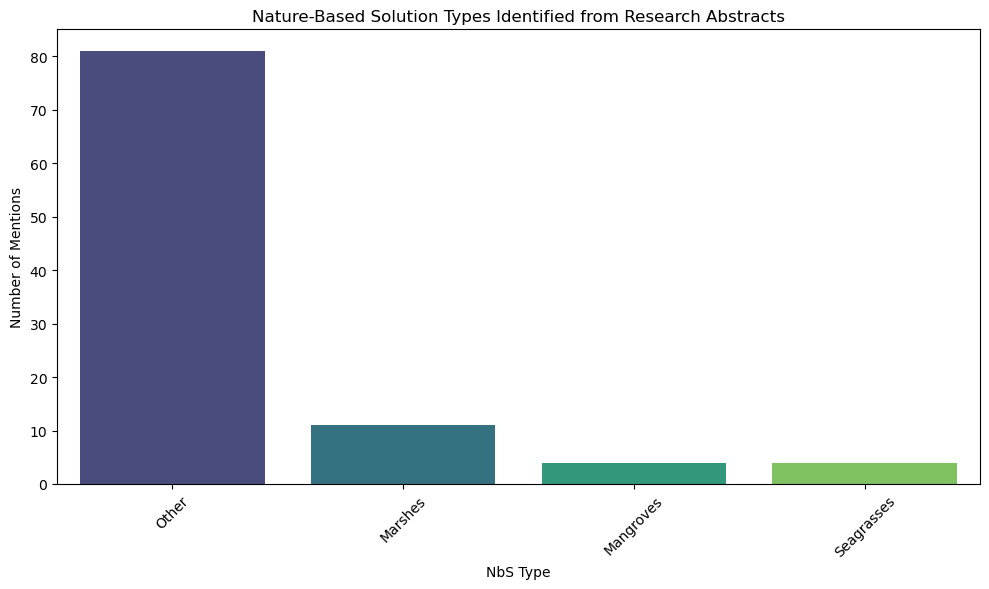

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='NbS_type', hue= 'NbS_type', order=df['NbS_type'].value_counts().index, palette='viridis', legend=False)

plt.title('Nature-Based Solution Types Identified from Research Abstracts')
plt.xlabel('NbS Type')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [86]:
grouped = df.groupby(['NbS_type', 'sentiment']).size().reset_index(name='count')

grouped['total'] = grouped.groupby('NbS_type')['count'].transform('sum')

grouped['percentage'] = (grouped['count'] / grouped['total']) * 100

heatmap_data = grouped.pivot(index='NbS_type', columns='sentiment', values='percentage').fillna(0)

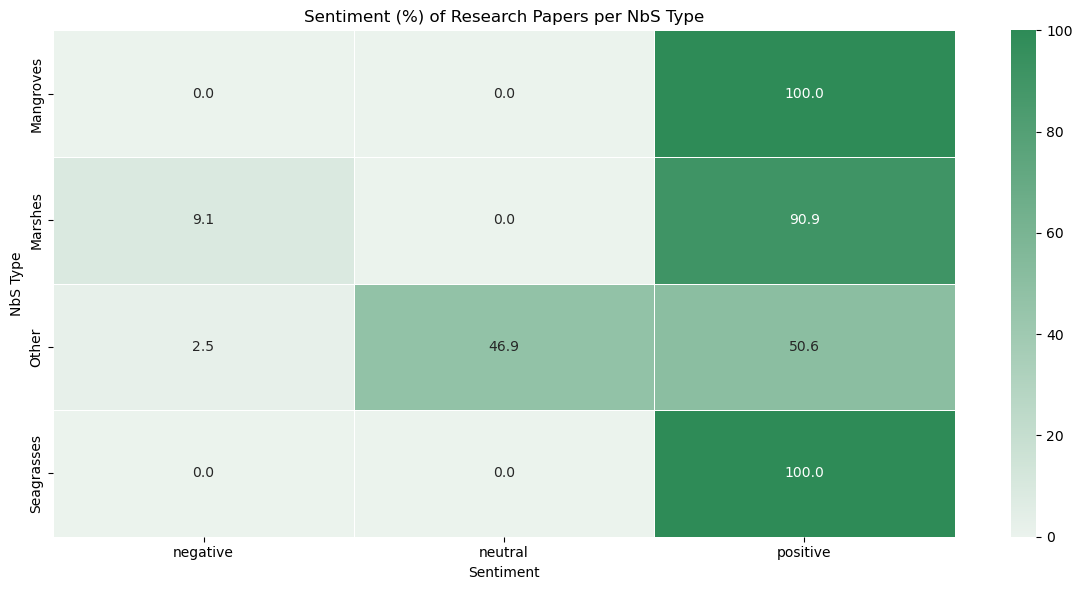

In [88]:
custom_palette = sns.light_palette("seagreen", as_cmap=True)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap= custom_palette, linewidths=0.5)

plt.title('Sentiment (%) of Research Papers per NbS Type')
plt.xlabel('Sentiment')
plt.ylabel('NbS Type')
plt.tight_layout()
plt.show()

In [ ]:
def extract_nbs_type(text):
    if pd.isna(text):
        return 'Other'
    text_lower = str(text).lower()
    for category, keywords in nbs_keywords.items():
        for keyword in keywords:
            if keyword in text_lower:
                return category
    return 'Other'

In [ ]:
df_media['NbS_type'] = df_media['text'].apply(extract_nbs_type)


In [ ]:
df_media[['text','NbS_type']].head(10)

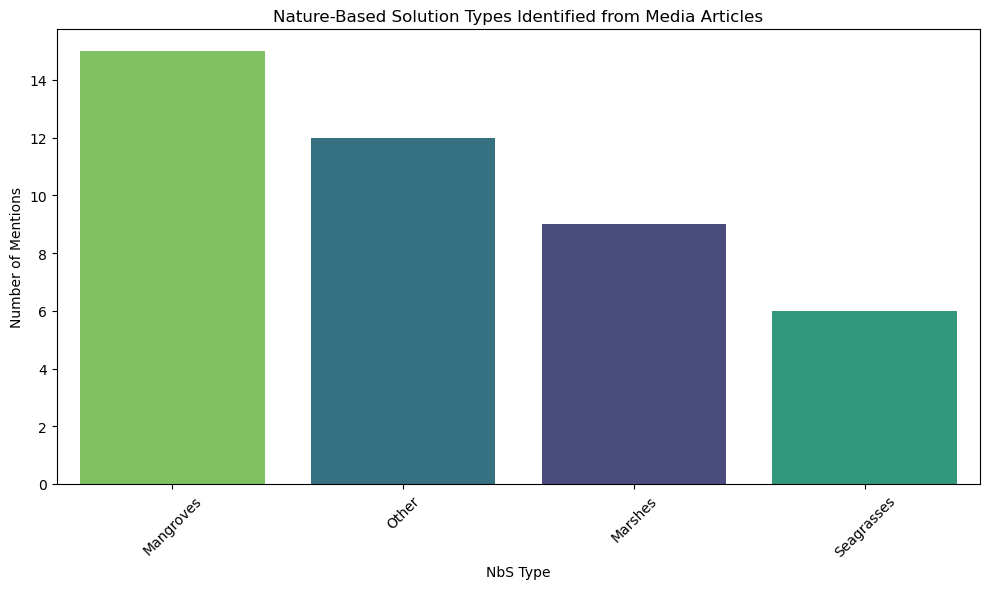

In [90]:

plt.figure(figsize=(10,6))
sns.countplot(data=df_media, x='NbS_type', hue= 'NbS_type', order=df_media['NbS_type'].value_counts().index, palette='viridis', legend=False)

plt.title('Nature-Based Solution Types Identified from Media Articles')
plt.xlabel('NbS Type')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

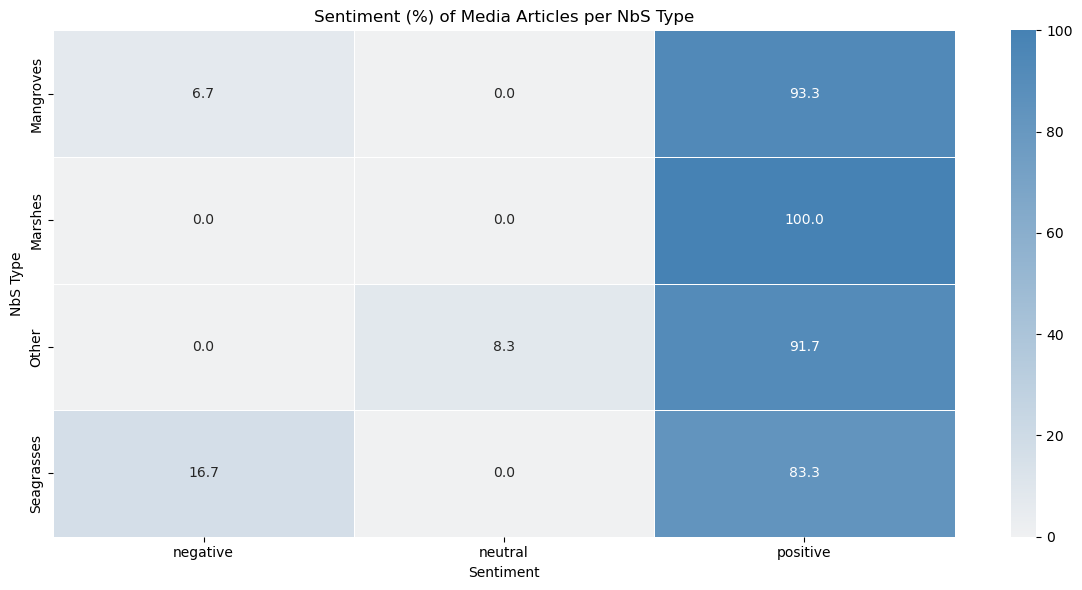

In [97]:
grouped = df_media.groupby(['NbS_type', 'sentiment']).size().reset_index(name='count')

grouped['total'] = grouped.groupby('NbS_type')['count'].transform('sum')

grouped['percentage'] = (grouped['count'] / grouped['total']) * 100

heatmap_data = grouped.pivot(index='NbS_type', columns='sentiment', values='percentage').fillna(0)

colour_palette= sns.light_palette("steelblue", as_cmap=True)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap=colour_palette, linewidths=0.5)

plt.title('Sentiment (%) of Media Articles per NbS Type')
plt.xlabel('Sentiment')
plt.ylabel('NbS Type')
plt.tight_layout()
plt.show()